<a href="https://colab.research.google.com/github/kailashkumar-S/kailashkumar-S/blob/main/%5CProjects%5CStock_Price_Simulation_GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Simulating a Random Walk of Stock Price

*A simple python program that implements the concepts explained in the chapter 13 of John C Hull's book - Options Futures and Other derivatives*

> A Monte Carlo simulation of a stochastic process is a method for sampling random outcomes of the process.
>
> To model the behavior of stock prices, I have used geometric Brownian motion (GBM).
>
>The discrete time version of the model is given by:

\begin{align}
\Delta S =\mu S\Delta t \ + \sigma S\epsilon \sqrt{\Delta t}
\end{align}

>The variable $Δ$S is the change in the stock price S in a small time interval $Δ$t, and as before $ϵ$ has a standard normal distribution (i.e., a normal distribution with a mean of zero and standard deviation of 1.0).

> The $μ$ is the expected rate of return per unit of time from the stock.
> The $σ$ is the volatility of the stock price. The volatality is calculated by finding the the standard deviation of the returns per unit time for a given period.

> In this example we will assume these parameters are constant.

>A path for the stock price over 7 days can be simulated by sampling repeatedly for $ϵ$ from $Φ(0,1)$; and substituting into equation. Different random samples would lead to different price movements.

>By repeatedly simulating movements in the stock price, a complete probability distribution of the stock price at the end of this time is obtained.

                                 Open        High         Low       Close  \
Date                                                                        
2023-06-13 00:00:00-04:00  331.873878  334.364405  327.825559  331.695282   
2023-06-14 00:00:00-04:00  331.744844  336.408374  330.226721  334.721558   
2023-06-15 00:00:00-04:00  334.860508  347.124556  334.582683  345.398071   
2023-06-16 00:00:00-04:00  348.593061  348.741891  339.295796  339.672821   
2023-06-20 00:00:00-04:00  336.676316  339.424805  333.253083  335.426086   
...                               ...         ...         ...         ...   
2024-06-05 00:00:00-04:00  417.809998  424.079987  416.299988  424.010010   
2024-06-06 00:00:00-04:00  424.010010  425.309998  420.579987  424.519989   
2024-06-07 00:00:00-04:00  426.200012  426.279999  423.000000  423.850006   
2024-06-10 00:00:00-04:00  424.700012  428.079987  423.890015  427.869995   
2024-06-12 00:00:00-04:00  435.320007  438.600006  433.250000  437.622101   

<function matplotlib.pyplot.show(close=None, block=None)>

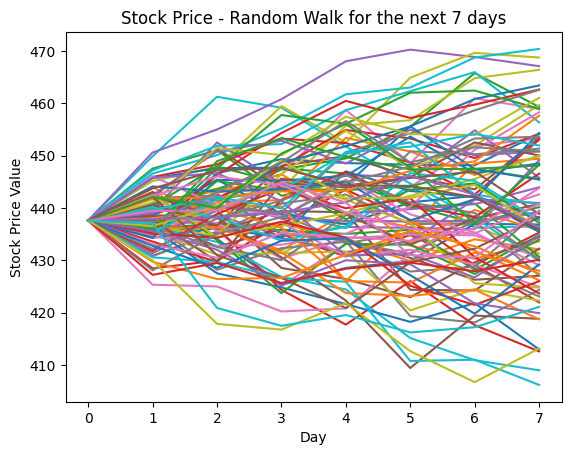

In [68]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

# A function that imports data of a given securities from Yahoo Finance
def data_download(sec_id,start_date,end_date):
    ticker = yf.Ticker(sec_id)
    print(ticker.history(start=start_date, end=end_date))
    hist = ticker.history(start=start_date, end=end_date)['Close']
    returns = hist.pct_change()
    returns = returns.dropna()
    mean_returns = returns.mean()
    std_returns = returns.std()
    return mean_returns, std_returns, hist


# Initialise using any stock ID
sec_id = "MSFT"

# Setting the time period of observations
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365)

#Calling the function to get the values
mean_returns, std_returns, hist = data_download(sec_id,start_date,end_date)

# Time increment for simulation - Here it is one day
dt = 1

# Monte Carlo Simulation

T = 7 # Number of time steps (days)
mc_sims = 100 # Number of Monte Carlo simulations

#Initial value for the simulation is the most recent closing price
initial_value = hist.iloc[len(hist)-1]


portfolio_sims = np.full(shape=(T,mc_sims),fill_value=0.00)

#Running the Monte Carlo Simulation
for m in range(mc_sims):
  Z = np.random.normal(size=(T,1))
  stochastic_term = np.sqrt(dt) * Z * std_returns
  mean_return = mean_returns * dt
  dt_return = stochastic_term + mean_return
  portfolio_sims[:,m] = np.cumprod(dt_return+1)*initial_value

#Appending the initial value of the stock to the top of the simulation results
initial_value_row = np.full(shape=(1, mc_sims), fill_value=initial_value)
portfolio_sims = np.vstack((initial_value_row, portfolio_sims))

# Plot the simulation results
plt.plot(portfolio_sims)
plt.title('Stock Price - Random Walk for the next 7 days')
plt.xlabel('Day')
plt.ylabel('Stock Price Value')
plt.show

